نصب نیازمندی ها

In [ ]:
!python3 -m pip install --upgrade mxnet
!python3 -m pip install --upgrade gluoncv

In [2]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from matplotlib import pyplot as plt
from gluoncv.data.transforms.presets.segmentation import test_transform
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


بارگیری تصویر

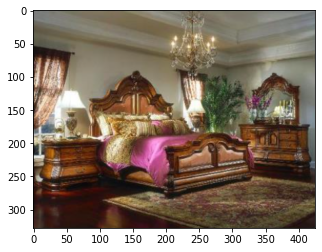

In [3]:
# using cpu
context = mx.cpu(0)

# load the image
filename = 'input.png'
img = image.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

# normalize the image using dataset mean
img = test_transform(img, context)

FCN روش

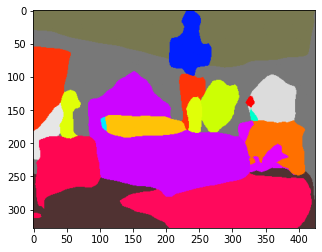

In [4]:
# Load the pre-trained model and make prediction
model = gluoncv.model_zoo.get_model('fcn_resnet101_ade', pretrained=True)

# make prediction using single scale
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

# Add color pallete for visualization

mask = get_color_pallete(predict, 'ade20k')
mask.save('output1.png')

# show the predicted mask
mmask = mpimg.imread('output1.png')
plt.imshow(mmask)
plt.show()

DeepLab v3 روش

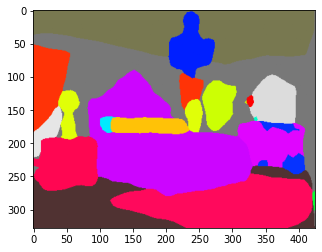

In [5]:
# Load the pre-trained model and make prediction
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

# make prediction using single scale
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

# Add color pallete for visualization
mask = get_color_pallete(predict, 'ade20k')
mask.save('output2.png')

# show the predicted mask
mmask = mpimg.imread('output2.png')
plt.imshow(mmask)
plt.show()